<a href="https://colab.research.google.com/github/NdopnnoabasiJames/Machine-Learning-Models/blob/main/KNN_On_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fashion MNIST - KNN Classification
# In this notebook, we'll classify fashion images (like shirts, shoes, bags) using K-Nearest Neighbors (KNN).
# The dataset contains 28x28 grayscale images, flattened into 784 features per sample.

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 2: Load and get dataset info
test_df = pd.read_csv('Datasets/Fashion/fashion-mnist_test.csv')
train_df = pd.read_csv('Datasets/Fashion/fashion-mnist_train.csv')


# Check basic info
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# Display first 5 rows
print("\nSample of training data:")
print(train_df.head())

# Check for missing values
print("\nMissing values per column:")
print(train_df.isnull().sum().head())

# View label distribution
print("\nLabel distribution:")
print(train_df['label'].value_counts())

Training data shape: (60000, 785)
Test data shape: (10000, 785)

Sample of training data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         

In [3]:
# Step 2 — Separate features (pixels) and labels

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (60000, 784)
Training labels shape: (60000,)
Test features shape: (10000, 784)
Test labels shape: (10000,)


Next step is scaling — this is crucial for KNN because it measures distance between points (using Euclidean distance).
If the pixel values (0–255) aren’t scaled, the algorithm will treat higher pixel intensities as more important than lower ones.

Step 3 — Normalize pixel values

We’ll scale the features to a range between 0 and 1 by dividing by 255:

In [4]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Scaled training data range:", X_train.min().min(), "to", X_train.max().max())

Scaled training data range: 0.0 to 1.0


All pixel values are now between 0 and 1, so the model won’t be biased toward brighter or darker images.

Now we can move to the next part:

## **Step 4 — Train the KNN classifier**

We’ll start simple with k = 3 (3 nearest neighbors) and use Euclidean distance by default.

Accuracy: 0.8584

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.91      0.87      0.89      1000
           4       0.81      0.77      0.79      1000
           5       0.99      0.82      0.90      1000
           6       0.68      0.59      0.63      1000
           7       0.88      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.97      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Text(50.722222222222214, 0.5, 'Actual')

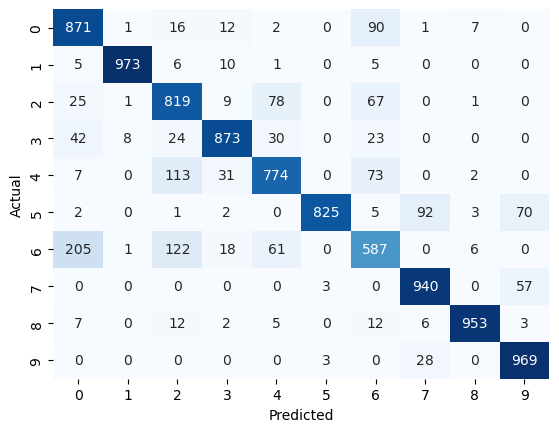

In [5]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Train the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

KNN Model (k = 3)

Accuracy: 85.84%

Interpretation:
The model correctly classified about 86% of the test images. That’s a solid starting point considering KNN doesn’t actually “learn”, it just compares distances between points.

k = 1, Accuracy = 0.8567
k = 2, Accuracy = 0.8530
k = 3, Accuracy = 0.8584
k = 4, Accuracy = 0.8618
k = 5, Accuracy = 0.8589
k = 6, Accuracy = 0.8606
k = 7, Accuracy = 0.8558
k = 8, Accuracy = 0.8571
k = 9, Accuracy = 0.8561
k = 10, Accuracy = 0.8573
k = 11, Accuracy = 0.8556
k = 12, Accuracy = 0.8553


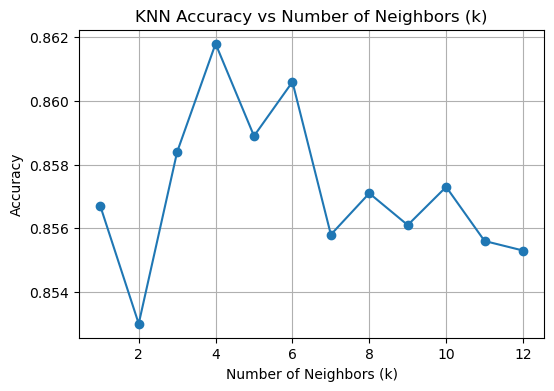

In [ ]:
# Finding the best k value for KNN

# We'll test different k values to see which gives the highest accuracy
k_values = range(1,13)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Perfect! k = 4 gives the highest accuracy at 0.8618. That’s the value we’ll use for the final KNN model.

Final KNN Accuracy: 0.8618

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.83      0.78      1000
           3       0.91      0.89      0.90      1000
           4       0.80      0.77      0.79      1000
           5       0.99      0.85      0.92      1000
           6       0.71      0.55      0.62      1000
           7       0.88      0.96      0.92      1000
           8       0.98      0.95      0.96      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



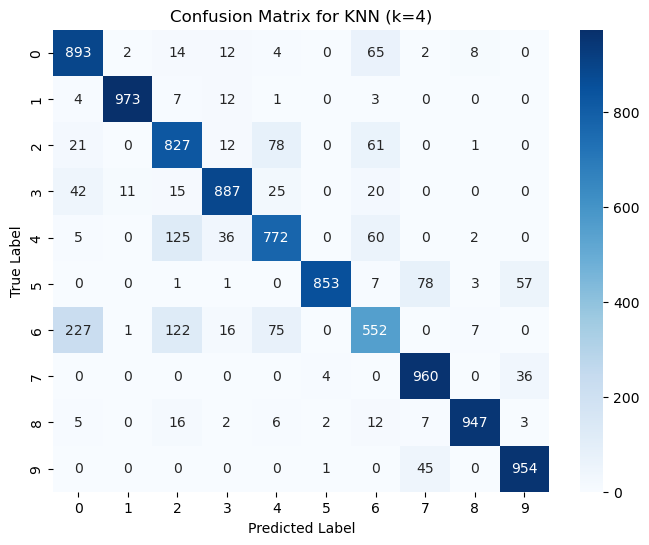

In [7]:
# Train the final KNN model with the best k
best_k = 4
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predict on test set
y_pred_final = knn_final.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc_final = accuracy_score(y_test, y_pred_final)
print("Final KNN Accuracy:", acc_final)

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for KNN (k={best_k})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

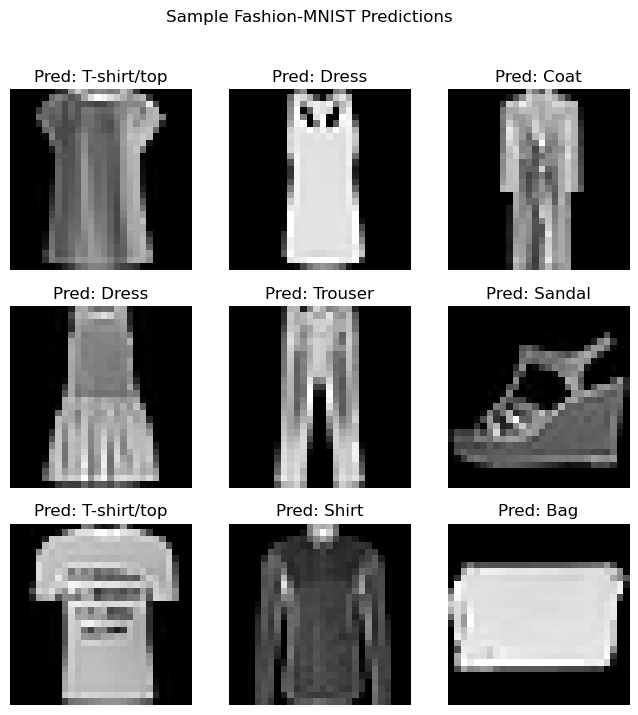

In [8]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Randomly pick 9 test images
sample_idx = np.random.choice(X_test.index, 9, replace=False)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample_idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_final[idx]]}")
    plt.axis('off')
plt.suptitle("Sample Fashion-MNIST Predictions")
plt.show()

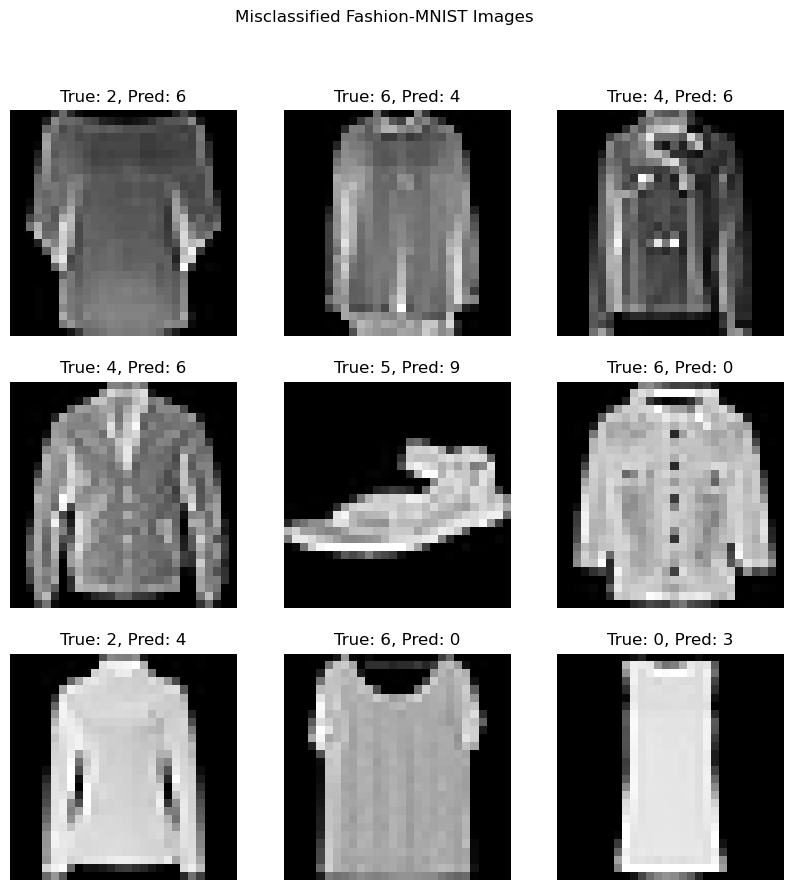

In [9]:
# Find misclassified examples
misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_test, y_pred_final)) if true != pred]

# Pick a few misclassified examples
num_to_show = 9
sample_idx = misclassified_idx[:num_to_show]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test.iloc[idx]}, Pred: {y_pred_final[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Fashion-MNIST Images")
plt.show()